**Section I: Import the data**

In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics, preprocessing
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
filepath = "~/DSI-course-materials/curriculum/04-lessons/week-07/instructor-contributions/SF/1.1-intro-to-clustering-kmeans/assets/datasets/mtcars.csv"
mtcars = pd.read_csv(filepath)

**Section II: Format the Data**

Convert to a Pandas Dataframe for our analysis.  Explore the data to get a sense of it.

In [5]:
print(mtcars.head())
print(mtcars.info())

                 Car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Car     32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6

Clean your dataset and do any normalization.

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


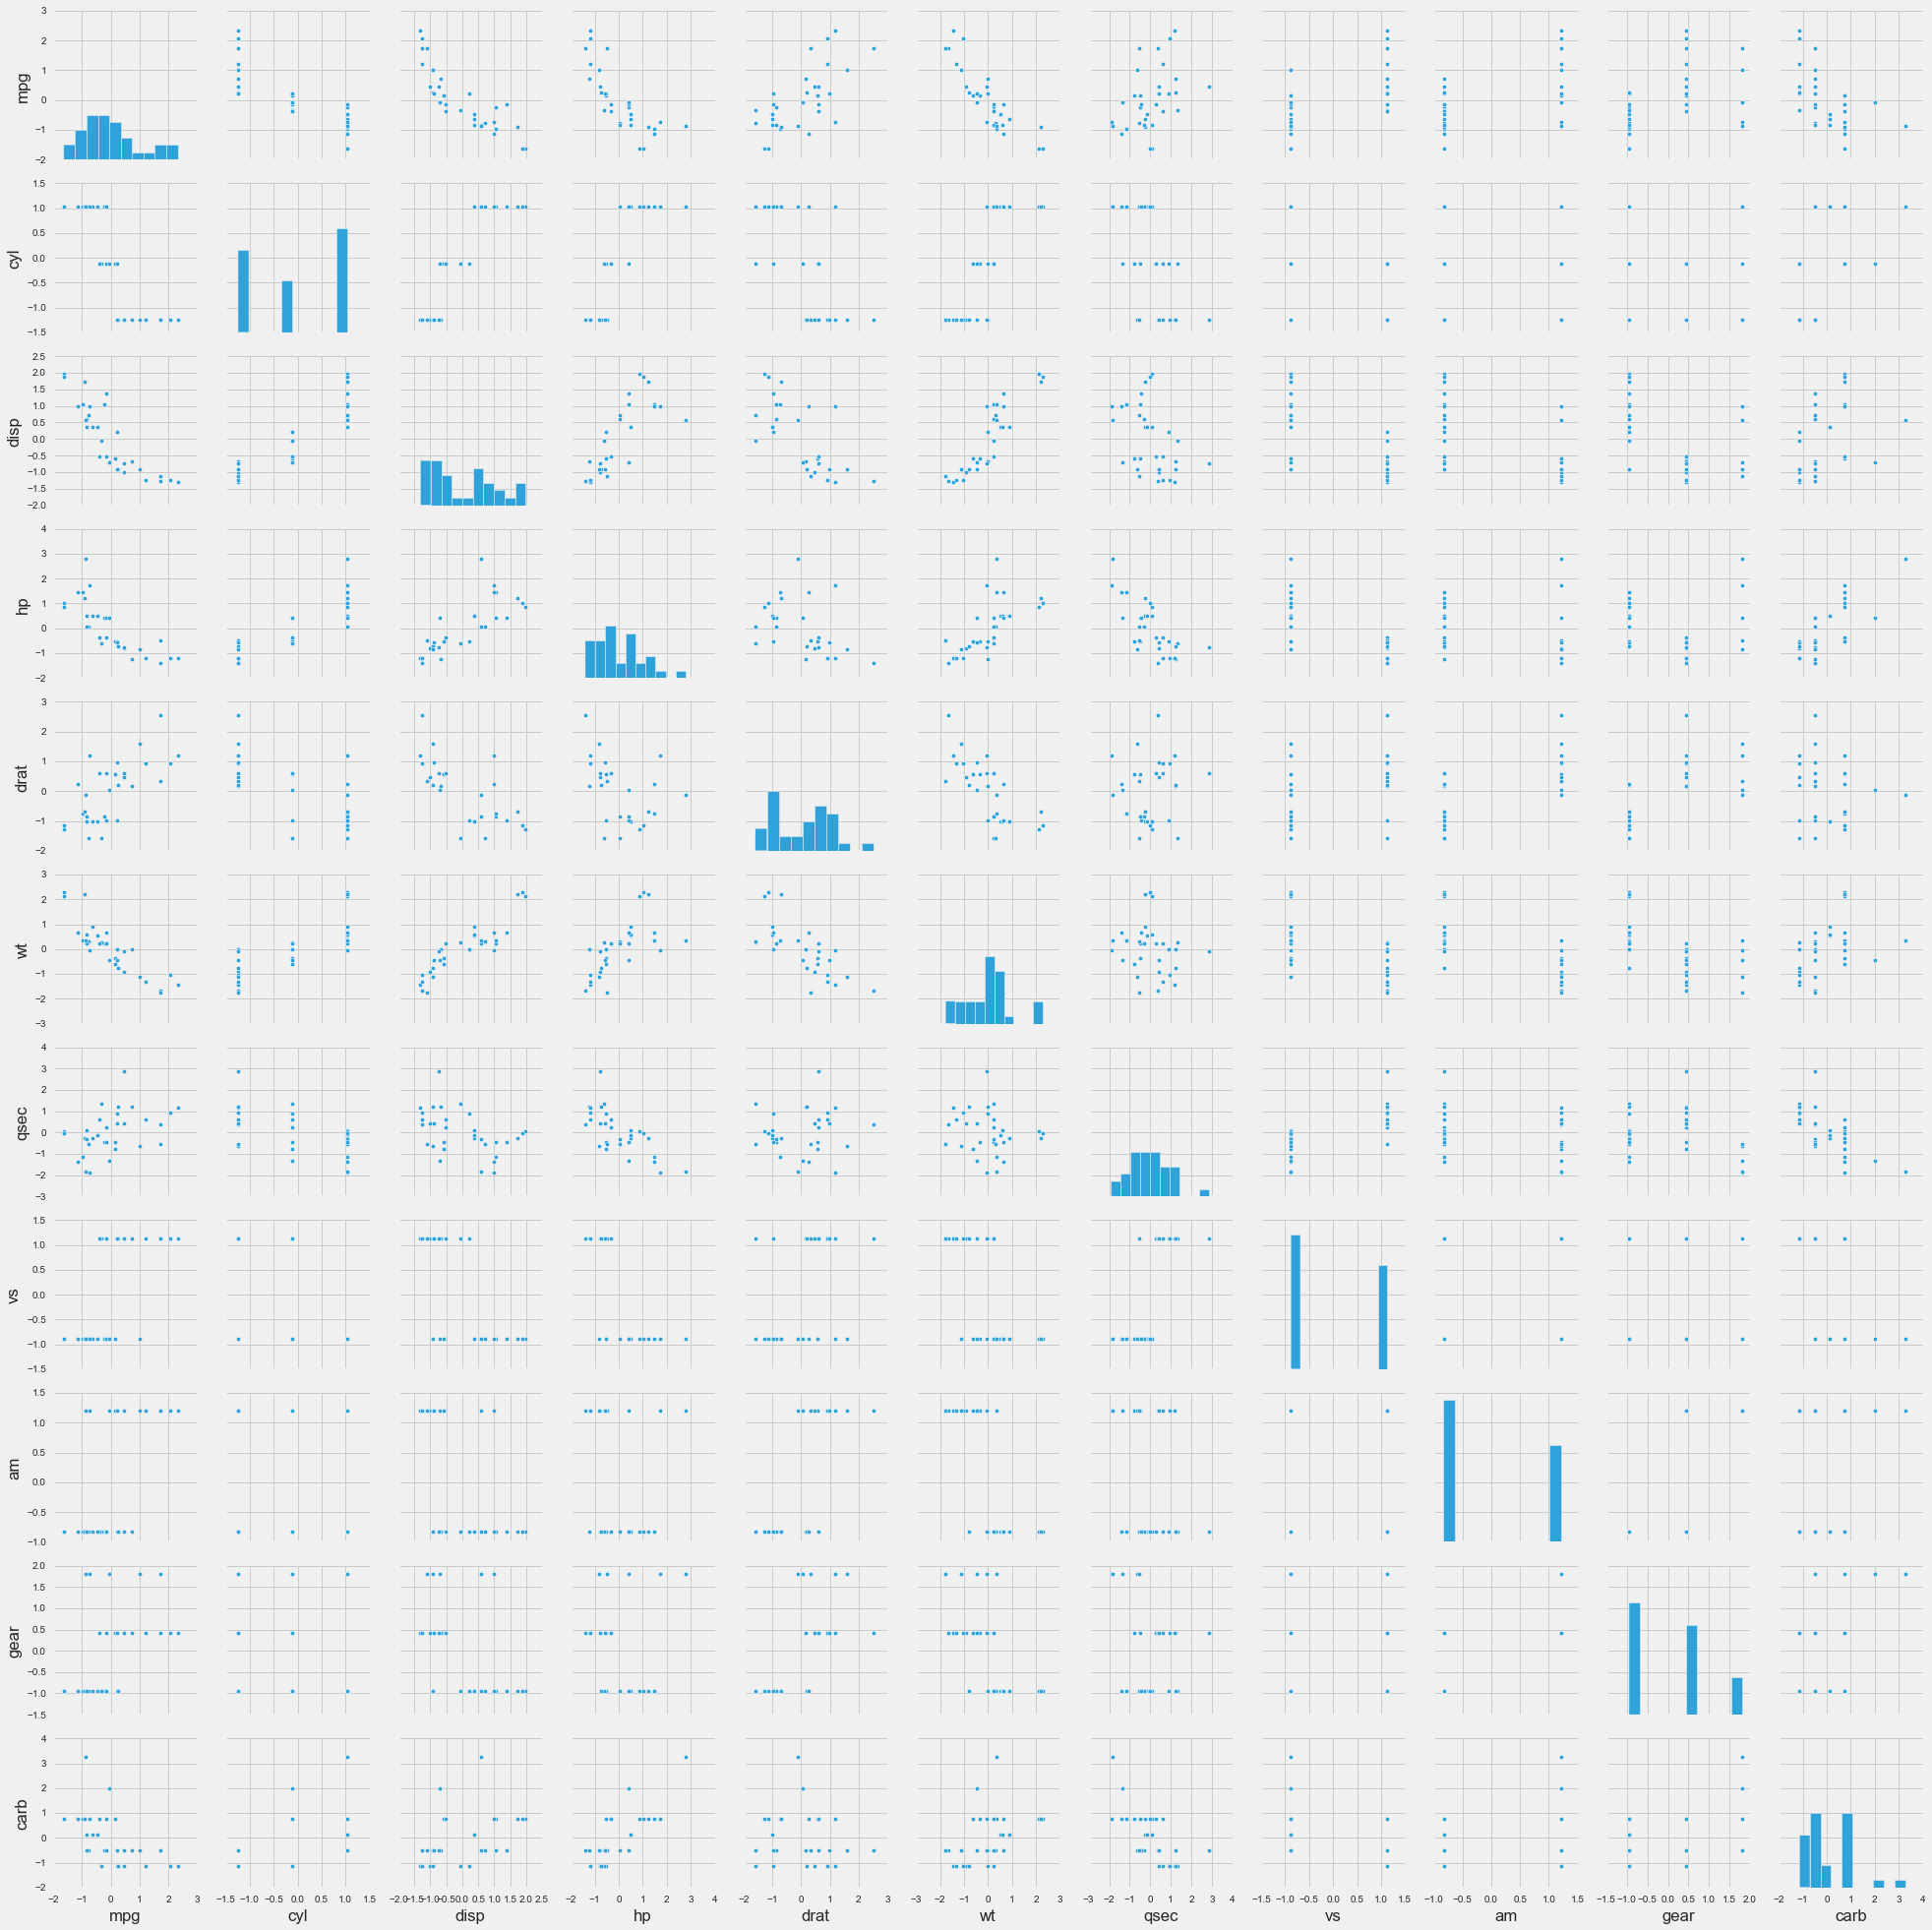

In [6]:
mask = (mtcars.dtypes == float) | (mtcars.dtypes == int)
mtcars.loc[:, mask] = mtcars.loc[:, mask].apply(preprocessing.scale)

sns.pairplot(mtcars)
plt.show()

Plot the Data. **HINT** Be sure to examine the different variables and how the relate to each other

In [7]:
# mtcars.plot(kind='scatter',x=' ',y=' ')
## Try this for multiple variable combinations

**Section III: Cluster the data**

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

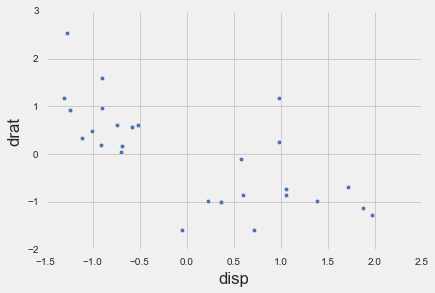

In [8]:
mtcars.plot.scatter(x = 'disp', y = 'drat')
plt.show()

In [19]:
X = mtcars[["disp", "drat"]]

kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(X)

labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

metrics.silhouette_score(X, labels, metric='euclidean')

0.61126520880130797

In [20]:
# Convert feature names to 1, 2
# Convert data to np array using `dn = df.as_matrix(columns=None)`

X = mtcars[["disp", "drat"]]
data_array = X.as_matrix(columns = None)

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(data_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Find the Silhoutte Score and plot

In [21]:
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

X.loc[:, "cluster"] = labels
X.loc[:, "cluster"] = X["cluster"].map({0:'b', 1:'r'})

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [22]:
X[X["cluster"].isnull()]

,disp,drat,cluster
23,0.977795,0.253559,NaN
28,0.985993,1.184661,NaN
30,0.576113,-0.107481,NaN


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


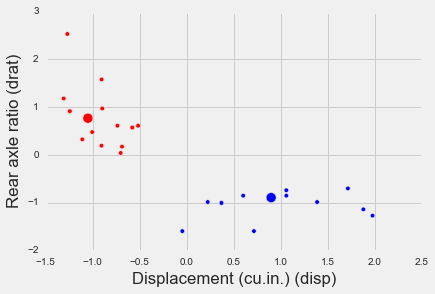

0.51913462776558639

In [24]:
X.dropna(inplace = True)

sns.plt.scatter(x = "disp", y = "drat", data = X, c = X["cluster"])
sns.plt.scatter(centroids[0], centroids[1], c=['b', 'r'], s=100)
plt.xlabel("Displacement (cu.in.) (disp)")
plt.ylabel("Rear axle ratio (drat)")
sns.plt.show()

metrics.silhouette_score(data_array, labels, metric='euclidean')

> A ratio (`drat`) that is "low" in the number of drive shaft rotations for every axle rotation results in lower engine rpm and in better fuel economy, longer engine life and quieter running. But it won't be good for quick acceleration, climbing grades, carrying loads or pulling a trailer.